In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install catboost

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [ ]:
#Read the dataset
df = pd.read_csv('/content/drive/MyDrive/Laptop_Price Prediction /laptop_price - dataset.csv')

In [ ]:
#Show the dataset
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
# Show the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [ ]:
# Checking null value
df.isna().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
CPU_Company,0
CPU_Type,0
CPU_Frequency (GHz),0
RAM (GB),0
Memory,0


In [ ]:
# Checking duplicate value
d = df.duplicated().sum().item()
print(f'duplicated values: {d}')

duplicated values: 0


In [ ]:
# Correlation between the features
x = df.corr(numeric_only=True)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
Company,1.000000,0.069802,0.001678,-0.082380,0.086479,0.047634,-0.004720,0.133191,0.041771,0.057219,0.059911,-0.064761,0.127853,-0.128194,0.136541
Product,0.069802,1.000000,0.076330,-0.213195,0.173117,0.198192,0.115076,-0.043060,0.018830,0.082782,0.097287,0.063803,0.114857,-0.244554,0.142888
TypeName,0.001678,0.076330,1.000000,-0.086162,-0.171231,-0.048875,-0.127242,-0.082810,-0.242265,0.016451,-0.220459,0.215271,0.090069,-0.275440,-0.125648
Inches,-0.082380,-0.213195,-0.086162,1.000000,-0.249594,-0.134922,0.195321,0.305037,0.241078,-0.188753,0.094111,-0.209858,0.039672,0.826638,0.066608
ScreenResolution,0.086479,0.173117,-0.171231,-0.249594,1.000000,0.134512,0.174664,0.055375,0.227288,0.068113,0.122643,-0.022656,0.063497,-0.134829,0.322761
CPU_Company,0.047634,0.198192,-0.048875,-0.134922,0.134512,1.000000,0.327164,-0.137123,0.102239,-0.000449,0.480535,-0.308513,-0.049561,-0.067674,0.177881
CPU_Type,-0.004720,0.115076,-0.127242,0.195321,0.174664,0.327164,1.000000,0.219135,0.436243,0.027676,0.296056,-0.116222,0.123982,0.222328,0.473860
CPU_Frequency (GHz),0.133191,-0.043060,-0.082810,0.305037,0.055375,-0.137123,0.219135,1.000000,0.366254,-0.068223,0.169774,-0.225074,0.219762,0.318649,0.428847
RAM (GB),0.041771,0.018830,-0.242265,0.241078,0.227288,0.102239,0.436243,0.366254,1.000000,0.161390,0.280375,-0.185136,0.140002,0.389370,0.740287
Memory,0.057219,0.082782,0.016451,-0.188753,0.068113,-0.000449,0.027676,-0.068223,0.161390,1.000000,0.006993,0.056919,0.037335,-0.162079,0.198114


In [ ]:
# Using labelencoder [Converting catergorical labels into numeric values]

encoder = LabelEncoder()

df['Company'] = encoder.fit_transform(df['Company'])
df['Product'] = encoder.fit_transform(df['Product'])
df['TypeName'] = encoder.fit_transform(df['TypeName'])
df['ScreenResolution'] = encoder.fit_transform(df['ScreenResolution'])
df['CPU_Company'] = encoder.fit_transform(df['CPU_Company'])
df['CPU_Type'] = encoder.fit_transform(df['CPU_Type'])
df['Memory'] = encoder.fit_transform(df['Memory'])
df['GPU_Company'] = encoder.fit_transform(df['GPU_Company'])
df['GPU_Type'] = encoder.fit_transform(df['GPU_Type'])
df['OpSys'] = encoder.fit_transform(df['OpSys'])

In [ ]:
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,1,300,4,13.3,23,1,40,2.3,8,4,2,56,8,1.37,1339.69
1,1,301,4,13.3,1,1,40,1.8,8,2,2,50,8,1.34,898.94
2,7,50,3,15.6,8,1,46,2.5,8,16,2,52,4,1.86,575.00
3,1,300,4,15.4,25,1,54,2.7,16,29,0,76,8,1.83,2537.45
4,1,300,4,13.3,23,1,40,3.1,8,16,2,57,8,1.37,1803.60


In [ ]:
# Spliting df into two parts
x = df.iloc[ : , 0:-1] # Only exclude last one
y = df.iloc[ : , -1] # Only include last one

In [ ]:
x

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg)
0,1,300,4,13.3,23,1,40,2.3,8,4,2,56,8,1.37
1,1,301,4,13.3,1,1,40,1.8,8,2,2,50,8,1.34
2,7,50,3,15.6,8,1,46,2.5,8,16,2,52,4,1.86
3,1,300,4,15.4,25,1,54,2.7,16,29,0,76,8,1.83
4,1,300,4,13.3,23,1,40,3.1,8,16,2,57,8,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,10,580,0,14.0,13,1,55,2.5,4,4,2,46,5,1.80
1271,10,588,0,13.3,19,1,55,2.5,16,29,2,46,5,1.30
1272,10,196,3,14.0,0,1,20,1.6,2,35,2,39,5,1.50
1273,7,2,3,15.6,0,1,55,2.5,6,10,0,88,5,2.19


In [ ]:
y

,Price (Euro)
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60
...,...
1270,638.00
1271,1499.00
1272,229.00
1273,764.00


In [ ]:
# Scaling data for enabling models to work faster
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
# Scaling data for enabling models to work faster
y_df = y.to_frame()
y = scaler.fit_transform(y_df)

In [ ]:
# Spliting dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
# Training models
model_1 = LinearRegression().fit(x_train,y_train)
model_2 = DecisionTreeRegressor().fit(x_train,y_train)
model_3 = RandomForestRegressor().fit(x_train,y_train)
model_4 = ExtraTreesRegressor().fit(x_train,y_train)
model_5 = AdaBoostRegressor().fit(x_train,y_train)
model_6 = XGBRegressor(verbose=0).fit(x_train,y_train)
model_7 = CatBoostRegressor(verbose=0).fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:37:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Calculate train and test scores

models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7]
models_names = ['LinearRegression','DecisionTreeRegressor', 'RandomForestRegressor','ExtraTreesRegressor', 'AdaBoostRegressor', 'XGBRegressor', 'CatBoostRegressor']

train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]

model_score = pd.DataFrame({
    'Model': models_names,
    'Train score': [f'{round(score * 100, 2)}%' for score in train_score],
    'Test score': [f'{round(score * 100, 2)}%' for score in test_score],
})

model_score

,Model,Train score,Test score
0,LinearRegression,68.65%,69.5%
1,DecisionTreeRegressor,99.97%,70.53%
2,RandomForestRegressor,97.83%,86.86%
3,ExtraTreesRegressor,99.97%,88.68%
4,AdaBoostRegressor,67.47%,68.76%
5,XGBRegressor,99.76%,90.27%
6,CatBoostRegressor,98.22%,90.6%


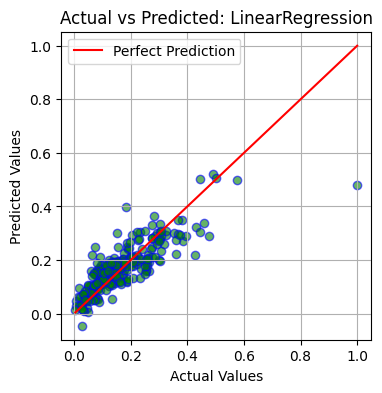

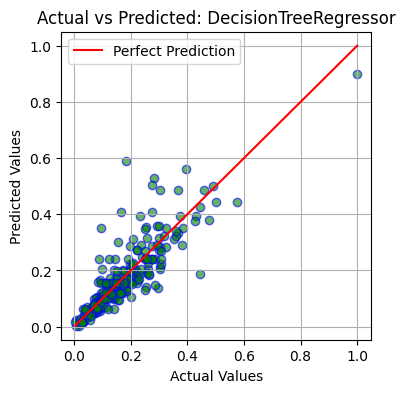

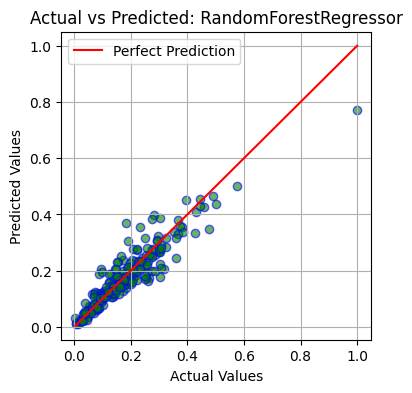

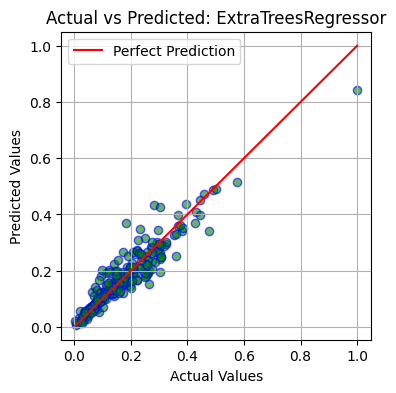

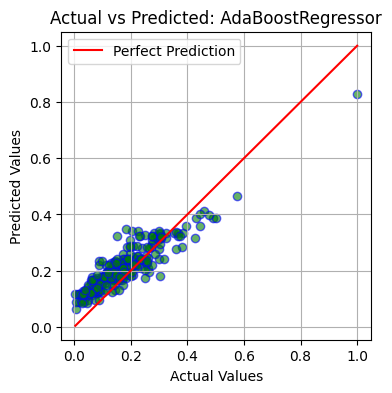

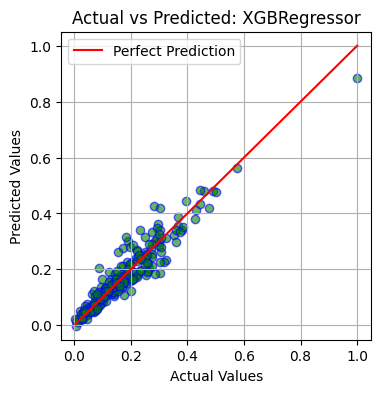

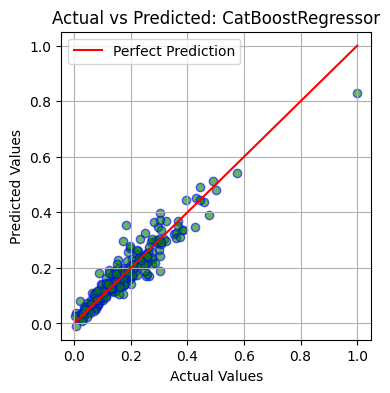

In [ ]:
# Plot of actual vs predicted value for all models

for model, name in zip(models, models_names):
    y_pred = model.predict(x_test)
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test, y_pred, color = 'green', alpha=0.6, edgecolor='b')
    plt.plot(
        [min(y_test), max(y_test)], [min(y_test), max(y_test)],
        color='red',label="Perfect Prediction"
    )
    plt.title(f"Actual vs Predicted: {name}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(True)
    plt.show()